# WeatherPy
----

* We will be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. 

### Import Dependencies & Api Keys

In [82]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

----
### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.

In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Performing a GET request & Converting the response to JSON
weather_response = requests.get(query_url + city).json()

#prett print JSON weather_response
pprint(weather_response)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 22.29, 'lon': 114.16},
 'dt': 1603165437,
 'id': 1819729,
 'main': {'feels_like': 25.78,
          'humidity': 64,
          'pressure': 1015,
          'temp': 24.09,
          'temp_max': 26.11,
          'temp_min': 20},
 'name': 'Hong Kong',
 'sys': {'country': 'HK',
         'id': 2035800,
         'sunrise': 1603146094,
         'sunset': 1603187664,
         'type': 3},
 'timezone': 28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 45, 'gust': 4.47, 'speed': 0.89}}


----
### Print log of each city 
* Include a print log of each city as it's being processed (with the city number and city name).

In [7]:
# Create empty lists to append the API data into lists 
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Start Processing Record counter at 1
counter = 0
num_set = 1

# Print Starting Data results
print(f"Beginning Data Retrieval")
print(f"-------------------------------")
    
# Loop through list of cities & perform a request for data on each city
for city in cities:

                    # ------------------------------------------------    
                    #  Exceptional Handling (Try & Except & Continue)
                    # ------------------------------------------------ 

# Try statement to append calls where value is found 
    try:
        response = requests.get(query_url + city).json()
        # pretty print new json requests for appending values to empty lists
        #pprint(response)
        
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
       
        # writing an if statement to reset counter set once it reaches 50
        if counter > 49:
            counter = 1
            num_set += 1
            #extract results
            results = response["name"]
        else:
            counter +=1
            #extract results
            results = response["name"]
            
        print(f"Processing Record {counter} of Set {num_set} | {results}")  
        
       # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1)
        
               
    except: 
         print("City Not Found. Skippig....")
    continue    

# Print Ending Data Results
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")


Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Dikson
Processing Record 2 of Set 1 | Rikitea
Processing Record 3 of Set 1 | San Cristobal
Processing Record 4 of Set 1 | Ushuaia
Processing Record 5 of Set 1 | Busselton
Processing Record 6 of Set 1 | Moindou
Processing Record 7 of Set 1 | Coquimbo
Processing Record 8 of Set 1 | Cape Town
Processing Record 9 of Set 1 | Fortuna
Processing Record 10 of Set 1 | Provideniya
Processing Record 11 of Set 1 | Bonavista
Processing Record 12 of Set 1 | Souillac
Processing Record 13 of Set 1 | Casino
Processing Record 14 of Set 1 | Warwick
Processing Record 15 of Set 1 | Kalmunai
Processing Record 16 of Set 1 | Hasaki
Processing Record 17 of Set 1 | Leningradskiy
Processing Record 18 of Set 1 | Jamestown
Processing Record 19 of Set 1 | Bethel
Processing Record 20 of Set 1 | Vila Franca do Campo
Processing Record 21 of Set 1 | Tiksi
Processing Record 22 of Set 1 | Hong Kong
Processing Record 23 of Set 1 | La C

Processing Record 38 of Set 4 | Bathsheba
Processing Record 39 of Set 4 | Kloulklubed
Processing Record 40 of Set 4 | Longyearbyen
Processing Record 41 of Set 4 | Rabaul
Processing Record 42 of Set 4 | Aberdeen
Processing Record 43 of Set 4 | Chapleau
Processing Record 44 of Set 4 | Beringovskiy
Processing Record 45 of Set 4 | Swellendam
Processing Record 46 of Set 4 | Roebourne
Processing Record 47 of Set 4 | Ahipara
Processing Record 48 of Set 4 | Itacoatiara
City Not Found. Skippig....
Processing Record 49 of Set 4 | Conakry
Processing Record 50 of Set 4 | Peleduy
Processing Record 1 of Set 5 | Huoqiu
Processing Record 2 of Set 5 | Ponta do Sol
Processing Record 3 of Set 5 | Peçanha
Processing Record 4 of Set 5 | Senanga
Processing Record 5 of Set 5 | Adelanto
Processing Record 6 of Set 5 | Kavaratti
Processing Record 7 of Set 5 | Krasnaya Zarya
Processing Record 8 of Set 5 | Tocopilla
Processing Record 9 of Set 5 | Carnarvon
City Not Found. Skippig....
Processing Record 10 of Set 5

Processing Record 28 of Set 8 | Arrondissement de Dinan
Processing Record 29 of Set 8 | Cuyo
Processing Record 30 of Set 8 | Gornorechenskiy
Processing Record 31 of Set 8 | Longhua
Processing Record 32 of Set 8 | Mayo
Processing Record 33 of Set 8 | Sept-Îles
Processing Record 34 of Set 8 | Doumé
Processing Record 35 of Set 8 | Tveit
Processing Record 36 of Set 8 | São José da Coroa Grande
Processing Record 37 of Set 8 | Petersberg
Processing Record 38 of Set 8 | Lavrentiya
Processing Record 39 of Set 8 | Asău
City Not Found. Skippig....
Processing Record 40 of Set 8 | Maragogi
Processing Record 41 of Set 8 | Bandarbeyla
Processing Record 42 of Set 8 | San Patricio
Processing Record 43 of Set 8 | Salym
Processing Record 44 of Set 8 | Salta
Processing Record 45 of Set 8 | Kalabo
Processing Record 46 of Set 8 | Baturité
Processing Record 47 of Set 8 | Salalah
Processing Record 48 of Set 8 | Lethem
Processing Record 49 of Set 8 | Garissa
Processing Record 50 of Set 8 | Tommot
Processing R

Processing Record 15 of Set 12 | San Luis
Processing Record 16 of Set 12 | Crateús
Processing Record 17 of Set 12 | Bama
City Not Found. Skippig....
City Not Found. Skippig....
Processing Record 18 of Set 12 | Kalianget
Processing Record 19 of Set 12 | Nizhnekamsk
Processing Record 20 of Set 12 | Cockburn Town
Processing Record 21 of Set 12 | Santa María del Río
Processing Record 22 of Set 12 | Galle
Processing Record 23 of Set 12 | Udachny
Processing Record 24 of Set 12 | Carolina
Processing Record 25 of Set 12 | Gigmoto
Processing Record 26 of Set 12 | Rialma
Processing Record 27 of Set 12 | Anadyr
Processing Record 28 of Set 12 | Saint Stephen
Processing Record 29 of Set 12 | Maumere
-------------------------------
Data Retrieval Complete
-------------------------------


----
### Convert Raw Data to DataFrame
* Display the DataFrame

In [33]:
# Create a DataFrame
weather_data = pd.DataFrame({
                             "City": city_name,
                             "Lat": lat,
                             "Lng": lng,
                             "Max Temp": max_temp,
                             "Humidity": humidity,
                             "Cloudiness": cloudiness,
                             "Wind Speed": wind_speed,
                             "Country": country,
                             "Date": date,
})

# Display the DataFrame Head
weather_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.51,80.55,-3.97,94,98,7.26,RU,1603165638
1,Rikitea,-23.12,-134.97,23.47,77,0,5.23,PF,1603165589
2,San Cristobal,7.77,-72.22,19.54,83,95,0.69,VE,1603165631
3,Ushuaia,-54.80,-68.30,2.00,89,75,15.40,AR,1603165556
4,Busselton,-33.65,115.33,25.00,33,5,2.91,AU,1603165642


----
### Export & Save Data
* Export the city data into a .csv.

In [40]:
# Export DataFrame & Save DataFrame it to a .CSV
weather_data.to_csv('../output_data/weather_data.csv')

----
### Display Basic Summary Statistics

In [12]:
# Display basic summary statistical details of our data
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.171554,19.422988,15.474266,71.552677,52.207254,3.465475,1.603166e+09
std,33.536748,88.669232,11.303981,20.793312,39.399847,2.510991,2.174864e+02
min,-54.800000,-175.200000,-11.240000,13.000000,0.000000,0.210000,1.603165e+09
25%,-6.635000,-58.635000,6.110000,61.000000,7.000000,1.610000,1.603166e+09
50%,23.630000,23.270000,17.000000,76.000000,58.000000,2.740000,1.603166e+09
75%,48.535000,93.525000,25.000000,87.500000,90.000000,4.690000,1.603166e+09
max,78.220000,179.320000,38.000000,100.000000,100.000000,17.500000,1.603166e+09


#### Inspect the data and remove the cities where the humidity > 100%.
* Skip this step if there are no cities that have humidity > 100%. 

In [21]:
#Read CSV File
pd.read_csv("weather_data.csv", index_col = 0)

#  Get the indices of cities that have humidity over 100%.
humidity_greater_100 = weather_data.loc[weather_data["Humidity"] > 100]
humidity_greater_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


##### Data for  humidity > 100%  Inspected :
* After running Summary Stat detail for our data and checking the data for Humidity, there are no cities with humidity higher than 100; therefore, the following steps will be skipped:
            * Make a new DataFrame equal to the city data to drop all humidity outliers by index.
            * Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data"


# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Converting Date/Time

In [74]:
# Imported Time at the beginning
# convert datetime to 10 digit value
my_time = time.strptime("10/20/20", "%m/%d/%y")
timevalue = time.mktime(my_time)
#print(timevalue)

# get the date from data frame's date column
time_stamp = time.gmtime(weather_data['Date'][0])

#printing current Date and time
print(time.strftime("%m/%d/%Y %H:%M:%S", time_stamp))

# set a variable for time_stamp to be used inside title string above graph
my_date = time.strftime("%x",ts)

10/20/2020 03:47:18


## Latitude vs. Temperature Plot

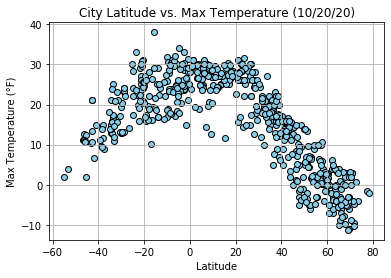

In [76]:
# Create a Scatter Plot for temperature vs. latitude
# Create a title, x label, and y label for our chart

plt.title(f"City Latitude vs. Max Temperature ({my_date})")
x_values = weather_data["Lat"]
y_values = weather_data["Max Temp"]
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'skyblue', edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Lat_vs_Temp_Scatterplot.png")

# Display Graph
plt.show()

## Latitude vs. Humidity Plot

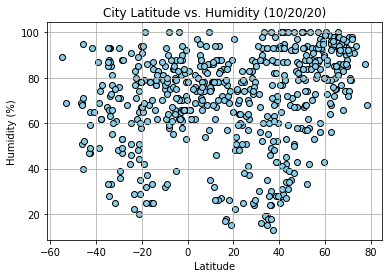

In [77]:
# Create a Scatter Plot for temperature vs. latitude
# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Humidity ({my_date})")
x_values = weather_data["Lat"]
y_values = weather_data["Humidity"]
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'skyblue', edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Lat_vs_Humid_Scatterplot.png")

# Display Graph
plt.show()

## Latitude vs. Cloudiness Plot

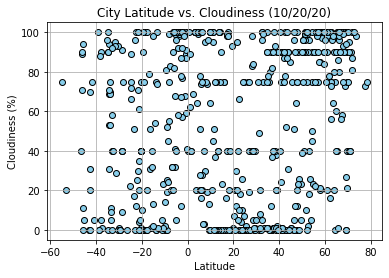

In [79]:
# Create a Scatter Plot for temperature vs. latitude
# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Cloudiness ({my_date})")
x_values = weather_data["Lat"]
y_values = weather_data["Cloudiness"]
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'skyblue', edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Lat_vs_Cloud_Scatterplot.png")

# Display Graph
plt.show()

## Latitude vs. Wind Speed Plot

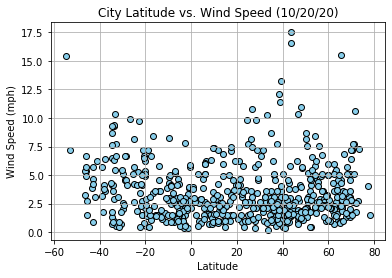

In [80]:
# Create a Scatter Plot for temperature vs. latitude
# Create a title, x label, and y label for our chart
plt.title(f"City Latitude vs. Wind Speed ({my_date})")
x_values = weather_data["Lat"]
y_values = weather_data["Wind Speed"]
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'skyblue', edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../Images/Lat_vs_Wind_Scatterplot.png")

# Display Graph
plt.show()

## Northern & Southern Hemisphere DataFrame

In [131]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] > 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

#northern_hemisphere.head()
#southern_hemisphere.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

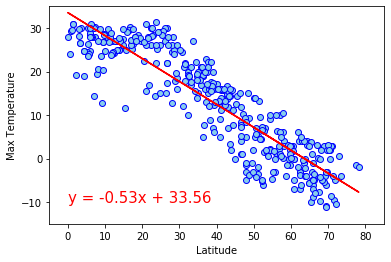

The r-value is: 0.8159776172443847
The correlation between Latitude and Max Temperature in Northern Hemisphere is -0.9


In [138]:
# Perform a linear regression on Northern Hemisphere Max Temp vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)

# Get regression values:create equation of line to calculate temp vs. Latitude
regress_values = x_values * slope + intercept


# Create new x and y values for Northern Hemisphere
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']

#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'skyblue', edgecolors ='blue')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Regression line on graph
plt.plot(x_values, regress_values,"-", color='red')

# linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# printing leaner equation on graph
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")

#settin x and y axis limits
plt.ylim(-15,35)
plt.xlim(-5, 85)

# Save the figure
plt.savefig("../Images/Northern_Hem_Lat_vs_Temp_Scatterplot.png")

# Display Graph
plt.show()

# R-Value
print(f"The r-value is: {rvalue**2}")

# Calculate the correlation coefficient 
print(f"The correlation between Latitude and Max Temperature in Northern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

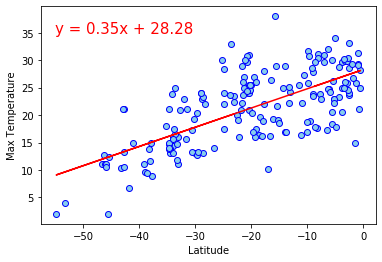

The r-value is: 0.4866761323760189
The correlation between Latitude and Max Temperature in Southern Hemisphere is 0.7


In [149]:
# Perform a linear regression on Southern Hemisphere Max Temp vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)

# Get regression values:create equation of line to calculate temp vs. Latitude
regress_values = x_values * slope + intercept


# Create new x and y values for Southern Hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']

#Create a Scatter Plot for Lattitude vs Temperature of City
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'skyblue', edgecolors ='blue')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Regression line on graph
plt.plot(x_values, regress_values,"-", color='red')

# linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# printing leaner equation on graph
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")


# Save the figure
plt.savefig("../Images/Southern_Hem_Lat_vs_Temp_Scatterplot.png")

# Display Graph
plt.show()

# R-Value
print(f"The r-value is: {rvalue**2}")

# Calculate the correlation coefficient 
print(f"The correlation between Latitude and Max Temperature in Southern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

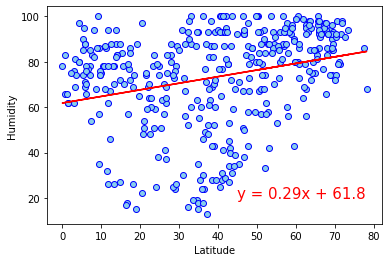

The r-value is: 0.0763245518304966
The correlation between Latitude and Humidity in Northern Hemisphere is 0.28


In [154]:
# Perform a linear regression on Northern Hemisphere Humidity(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)

# Get regression values:create equation of line to calculate Humidity vs. Latitude
regress_values = x_values * slope + intercept


# Create new x and y values for Northern Hemisphere
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']

#Create a Scatter Plot for Lattitude vs Humidity of City
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'skyblue', edgecolors ='blue')
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Regression line on graph
plt.plot(x_values, regress_values,"-", color='red')

# linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# printing leaner equation on graph
plt.annotate(line_eq,(45,20),fontsize=15,color="red")


# Save the figure
plt.savefig("../Images/Northern_Hem_Lat_vs_Humid_Scatterplot.png")

# Display Graph
plt.show()

# R-Value
print(f"The r-value is: {rvalue**2}")

# Calculate the correlation coefficient 
print(f"The correlation between Latitude and Humidity in Northern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

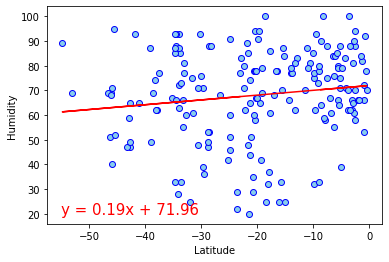

The r-value is: 0.020275065972691547
The correlation between Latitude and Humidity in Southern Hemisphere is 0.14


In [157]:
# Perform a linear regression on Southern Hemisphere Humidity(%) vs. Latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values,y_values)

# Get regression values:create equation of line to calculate Humidity vs. Latitude
regress_values = x_values * slope + intercept


# Create new x and y values for Southern Hemisphere
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']

#Create a Scatter Plot for Lattitude vs Humidity of City
plt.scatter(x_values,y_values, alpha = 1, marker = 'o', facecolors = 'skyblue', edgecolors ='blue')
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Regression line on graph
plt.plot(x_values, regress_values,"-", color='red')

# linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# printing leaner equation on graph
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")


# Save the figure
plt.savefig("../Images/Southern_Hem_Lat_vs_Humid_Scatterplot.png")

# Display Graph
plt.show()

# R-Value
print(f"The r-value is: {rvalue**2}")

# Calculate the correlation coefficient 
print(f"The correlation between Latitude and Humidity in Southern Hemisphere is {round(st.pearsonr(x_values,y_values)[0],2)}")

The r-value is: 0.014985174297345524


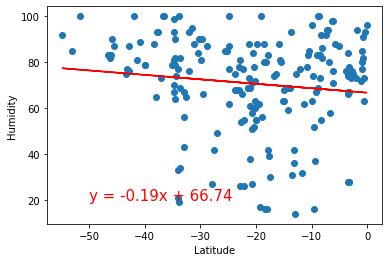

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


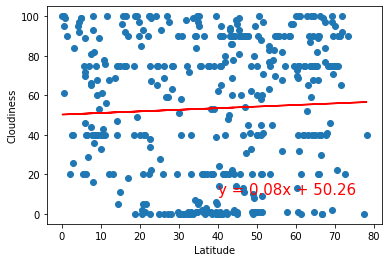

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


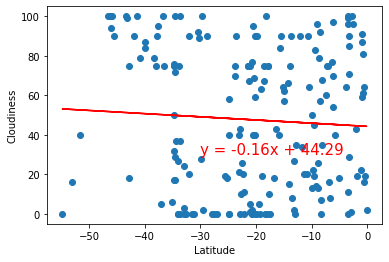

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


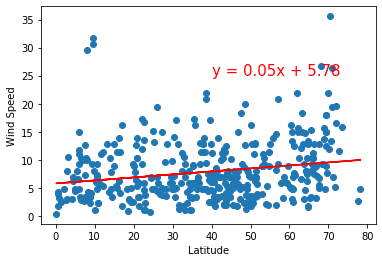

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


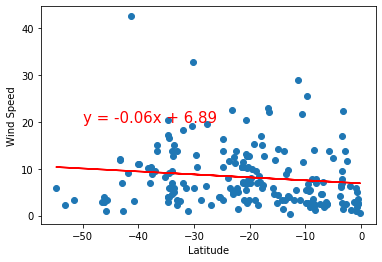